In [3]:
from pylab import *
%matplotlib inline
from IPython.display import Image

# ECE 532 Group Project
## Authors
* [Scott Sievert](http://scottsievert.com)
* Ian Kinesalla
* Blake Mason
# Introduction

# Overview

# Warmup
We would like to minimize the function
$$\phi(x) = L(x) + \lambda R(x)$$
Typically, $L : \mathbb{R}^n \rightarrow\mathbb{R}$ is a differentiable loss function that represents the distance from the optimal solution and $R : \mathbb{R}^n \rightarrow\mathbb{R}$ is some non-differentiable function that acts as a regularizer. This imposes some structure on estimated signal, typically sparsity of minimum energy.

One method to solve these problems is the [proximal gradient method]. In this method alternate between optimizing for the $x$ that minimizes the current estimate for $L$ and $R$. In words, the proximal gradient method takes a step in the gradient of $L$ then ensures the estimate found lies in the feasible solution set by feeding the result into a proximal operator.

## Lasso
We will step through the derivation for the proximal operator for lasso. We will ask the reader to implement the proximal operator.

### Loss function
As covered in class, the gradient of the squared error loss function is 
$$\nabla L(x) = -2A^T(y - Ax)$$

### Prox operator
*Theorem:* For minimizing $\phi(x) = ||y - Ax||^2_2 + \lambda||x||_1$, the proximal operator is 

$$\textrm{prox}_\lambda(x) = \textrm{sign}(z) \left(\left|z\right| - \frac{\lambda}{2}\right)_+$$

*Proof:* The prox operator for lasso is defined to be

$$\begin{align}
\textrm{prox}_\lambda(z) &= \arg \min_x ||x - z||_2^2 + \lambda ||x||_1\\
&= \arg\min_x \sum_i (x_i - z_i)^2 + |x_i|
\end{align}$$

meaning we can minimize each individual term separately.

$$\phi_{i, \lambda}(z) = (x_i - z_i)^2 + \lambda |x_i|$$
$$\nabla\phi_i(z) = 2 (x_i - z_i)^2 + \lambda\textrm{sign}(x_i)$$

using the subgradients and defining $\textrm{sign}(x) \in [-1, 1]$. Because we know that $\textrm{sign}(x_i) = \textrm{sign}(z_i)$, we can instead write this as

$$\nabla \phi_i(z) = 2 (x_i - z_i)^2 + \lambda\textrm{sign}(z_i)$$

To see help see this more clearly, this is the scalar case. This function, $\phi(x_i)$ is similar to a parabola when $\lambda \approx 0$ which means that $\widehat{x}_i \approx z_i$. When $\lambda$ becomes larger, the minima shifts but is never less than 0; the minima is obeys $\textrm{sign}\left(\widehat{x}_i\right) = \textrm{sign}(z_i)$. To illustrate this fact, we have provided plots in the figure below.

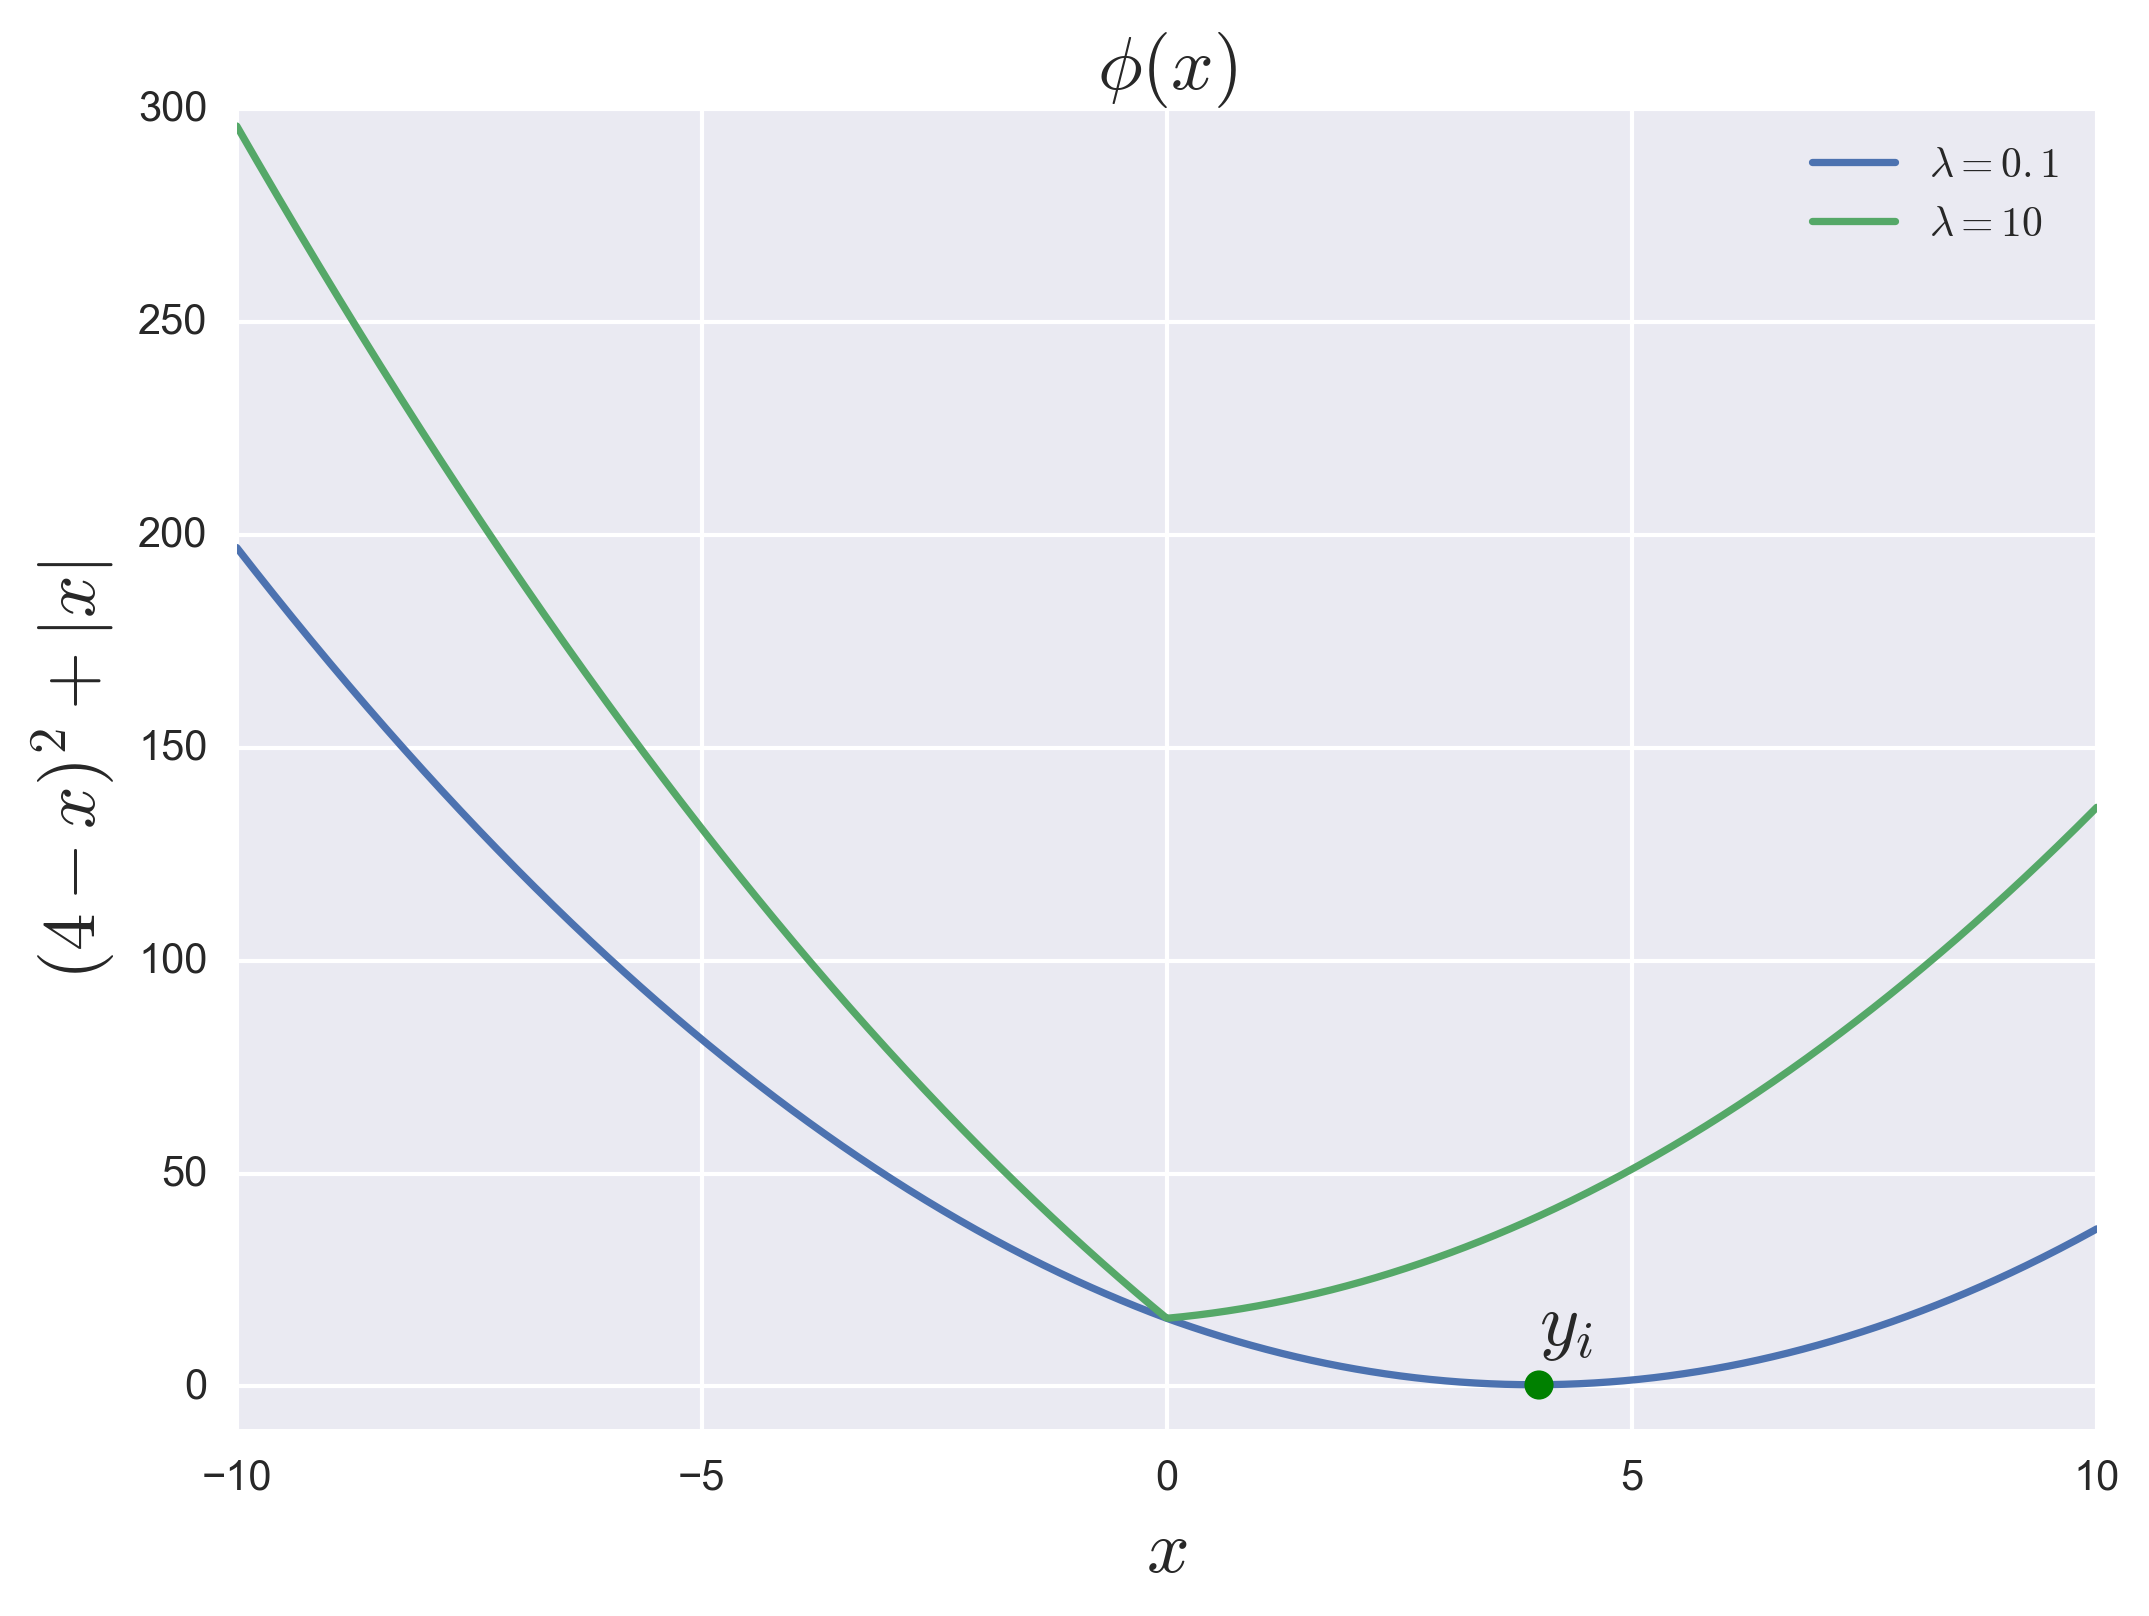

In [4]:
Image(filename='implementation/prox_scalar.png', width=500)

$$\begin{align}
\nabla \phi_i(x) &= 2 (x_i - z_i)^2 + \lambda\textrm{sign}(x_i)\\
&= 2 (x_i - z_i) + \lambda\textrm{sign}(z_i)
\end{align}$$

However, when we set $\nabla \phi_i = 0$, we see that there can be a sign disagreement. When we find $\widehat{x}_i$ by setting $\nabla \phi_i = 0$, we find that $\widehat{x}_i = -\frac{\lambda}{2}\textrm{sign}(z_i) + z_i$. When $|z_i| < \frac{\lambda}{2}$, $\textrm{sign}(x_i) \not = \textrm{sign}(x_i)$. This is the assumption we started out with, and it has to be made true. To make it true, we set

$$\widehat{x}_i = \textrm{sign}(z_i) \left( |z| - \lambda/2 \right)_+$$


### Task
Implement the prox operator and the loss function gradient for LASSO. The structure and output of the code is given.

In [5]:
def gradient(y, A, x):
    """
    returns the gradient of the loss function
    """

def prox(z, threshold):
    """
    :returns: \arg \min_x ||z - x||_2^2 + \lambda ||x||_1
    :param z: The input vector
    :param threshold: The threshold to determine the sign.
    """
    return x

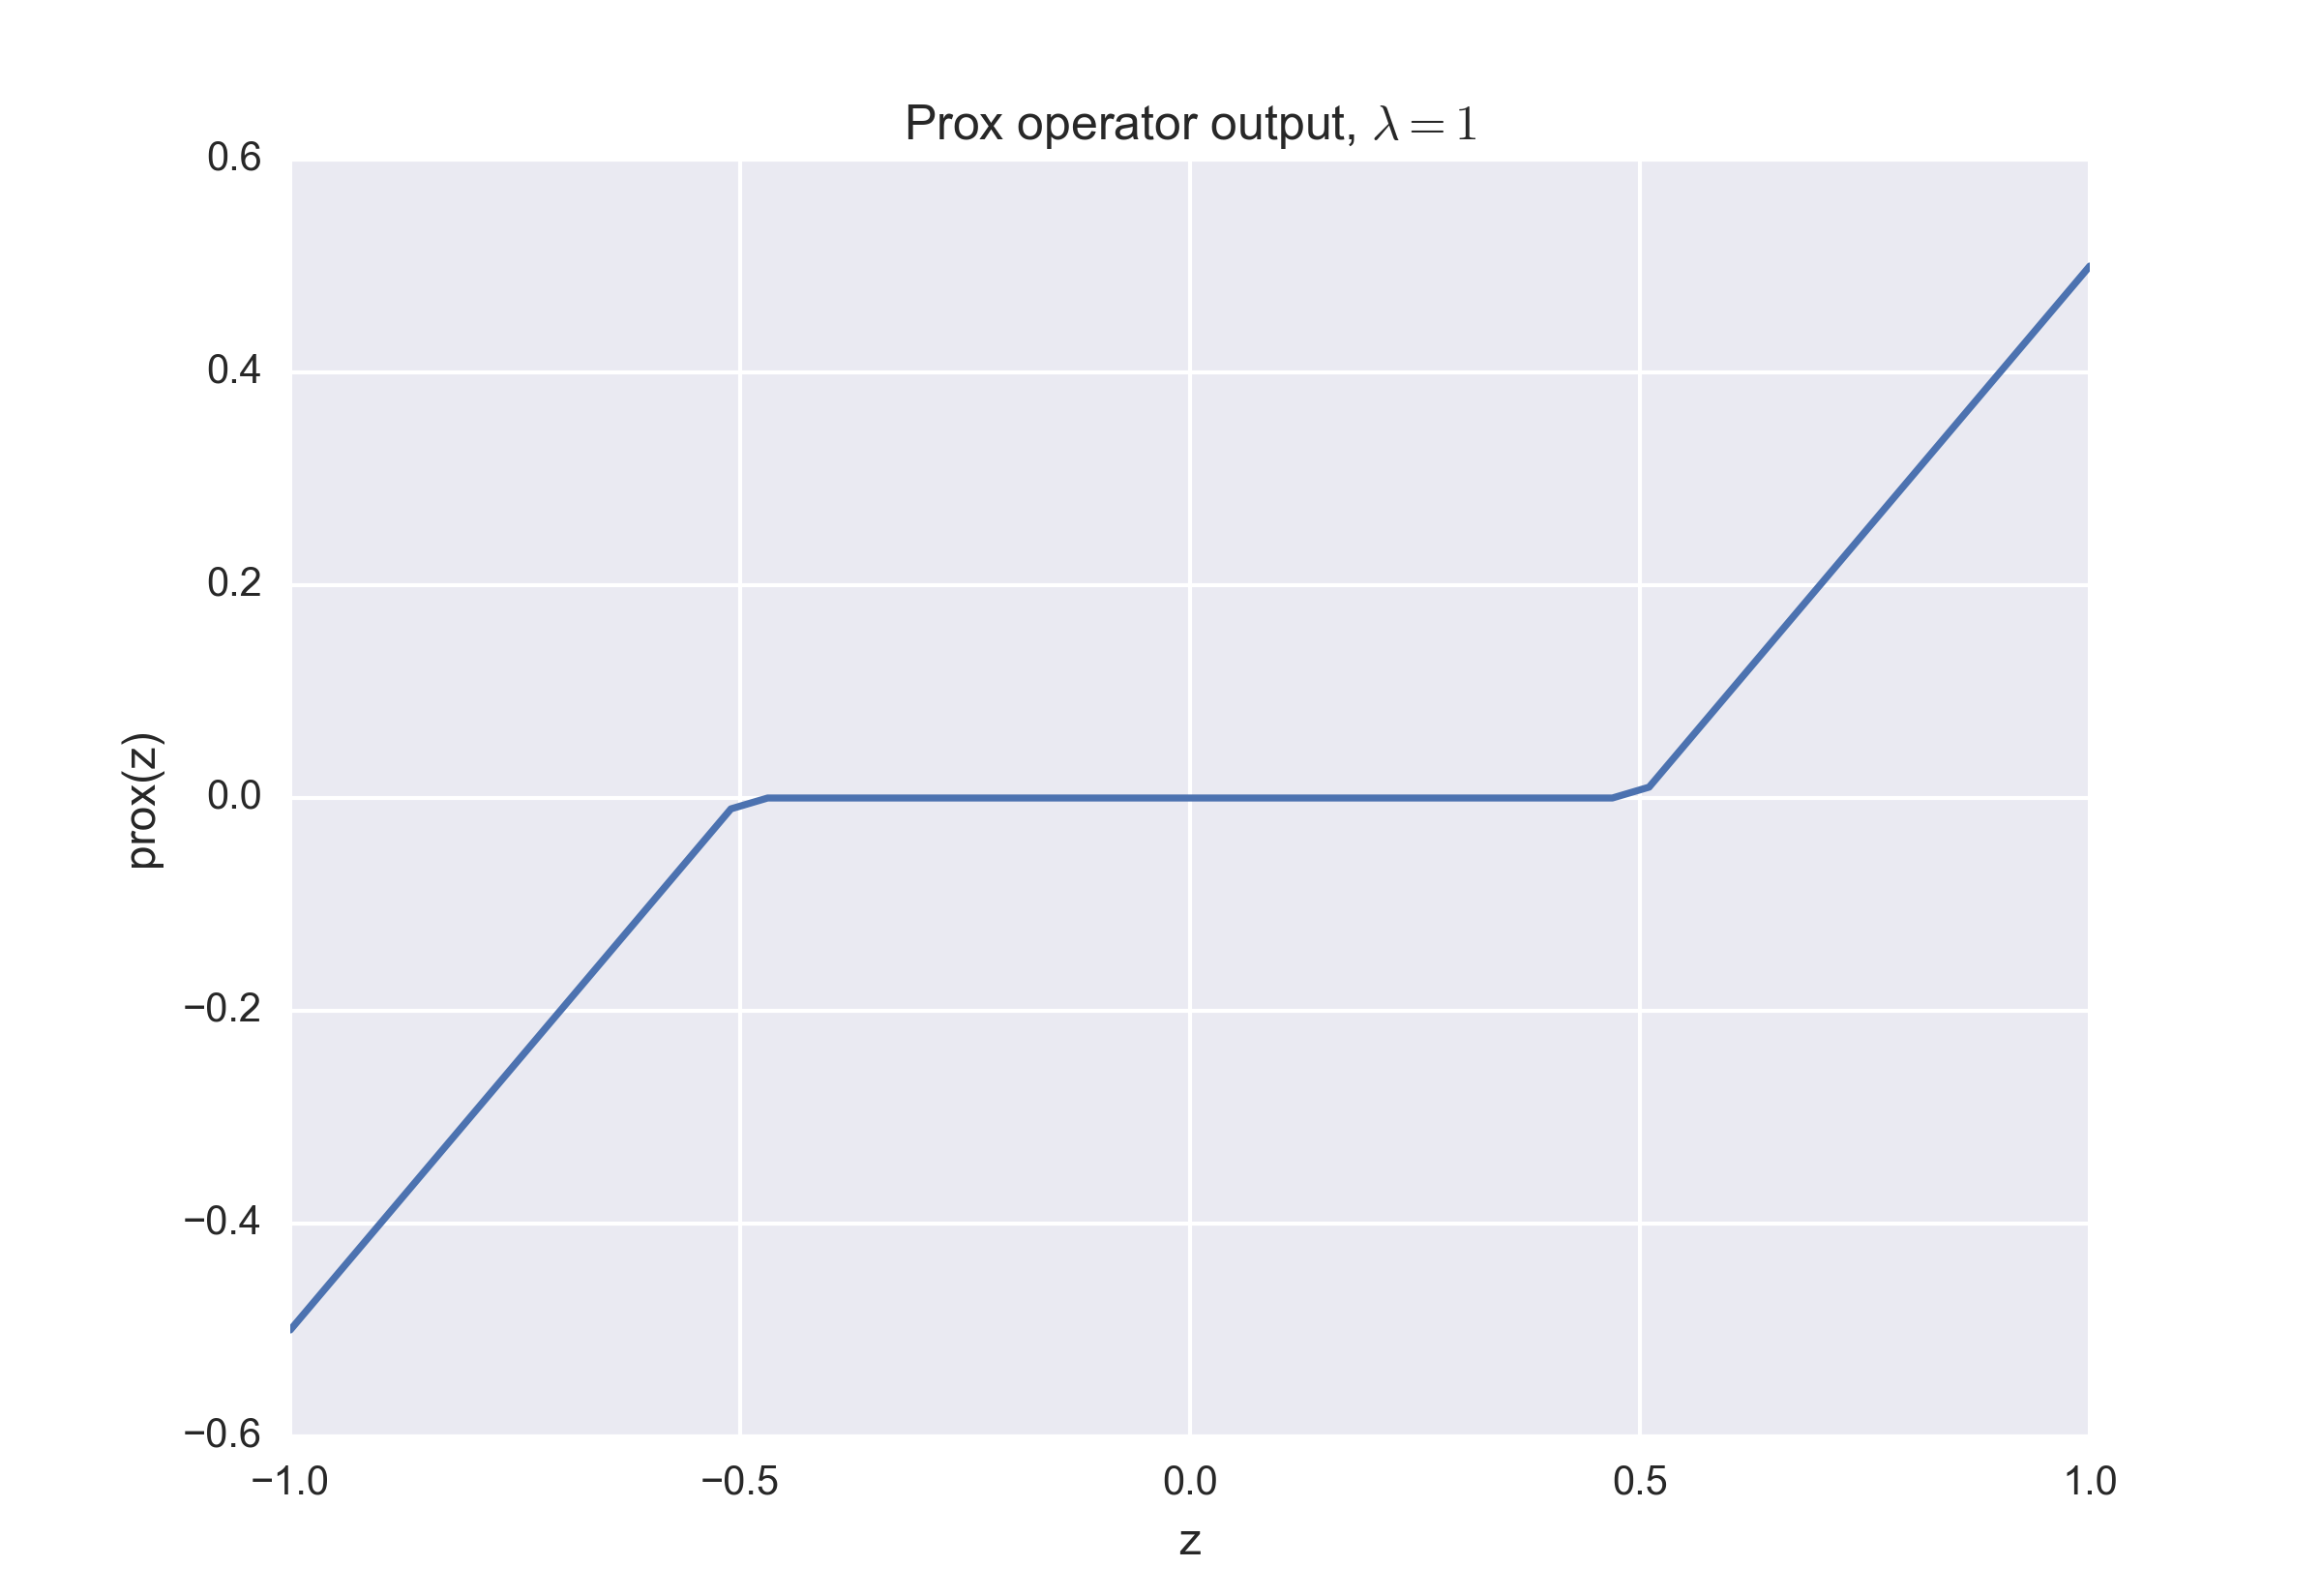

In [6]:
# graph of output
Image(filename='implementation/prox.png', width=500)

# Main lab